<a href="https://colab.research.google.com/github/wvirany/stat_learning/blob/main/classification/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
!pip install ISLP

In [1]:
from ISLP import load_data

In [93]:
Default = load_data('Default')

Default['default'] = np.where(Default['default'] == 'Yes', 1, Default['default'])
Default['default'] = np.where(Default['default'] == 'No', 0, Default['default'])

Default['student'] = np.where(Default['student'] == 'Yes', 1, Default['student'])
Default['student'] = np.where(Default['student'] == 'No', 0, Default['student'])

Default['default'] = Default['default'].astype('int')

Let's visualize the data

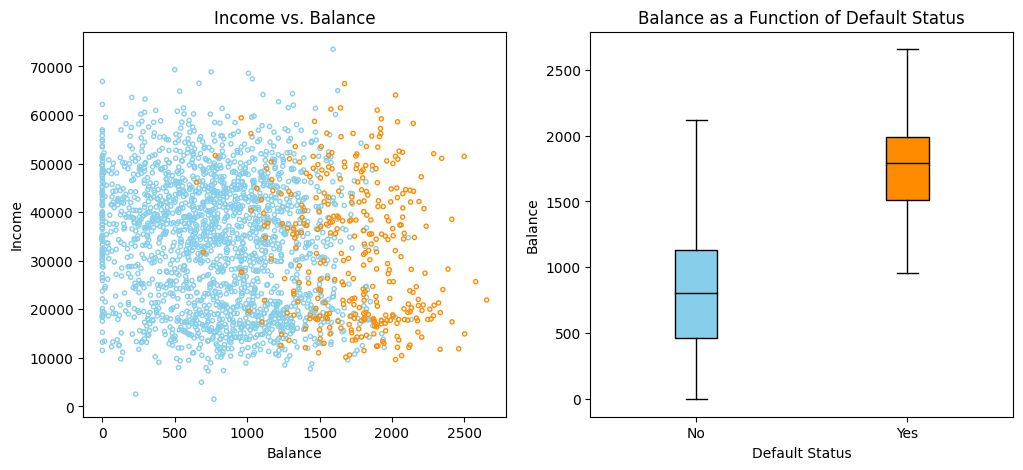

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

D2 = Default.sample(n=2000, random_state=3) # Taking subset of data

default_Y = Default.loc[Default['default'] == 1]
default_N = Default.loc[Default['default'] == 0]
default_N_sub = D2.loc[D2['default'] == 0]

axes[0].scatter(default_N_sub['balance'], default_N_sub['income'], marker='.', fc='none', ec='skyblue')
axes[0].scatter(default_Y['balance'], default_Y['income'], marker='.', fc='none', ec='darkorange')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Income')
axes[0].set_title('Income vs. Balance');

bplot = axes[1].boxplot([default_N['balance'], default_Y['balance']],
                sym='',
                widths=.2,
                labels=['No', 'Yes'],
                patch_artist=True,
                medianprops=dict(color='black'));

bplot['boxes'][0].set_facecolor('skyblue')
bplot['boxes'][1].set_facecolor('darkorange')

axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Balance')
axes[1].set_title('Balance as a Function of Default Status');

Note: The overall default rate is about 3%, so I only included a fraction of those who did not default.

In [120]:
X = Default['balance']
X = np.array(X).reshape(-1, 1)
y = Default['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [106]:
model = LogisticRegression()
model.fit(X_train, y_train);

In [107]:
def logistic_function(x, model):
  return (np.exp(model.intercept_ + model.coef_[0][0] * x)) / (1 + np.exp(model.intercept_ + model.coef_[0][0] * x))

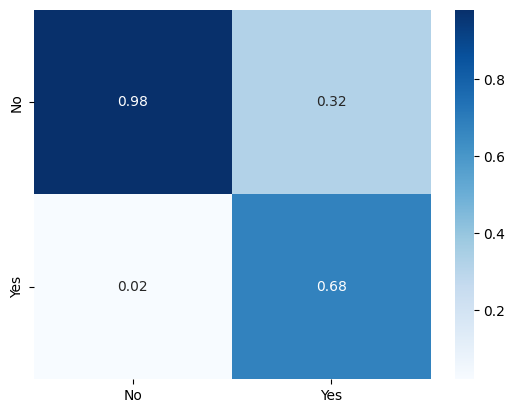

In [150]:
y_pred = model.predict(X_test)

c = confusion_matrix(y_test, y_pred, normalize='pred')
sns.heatmap(c,
            annot=True,
            cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes']);

We can interpret the confusion matrix as follows:
* 98% of those who did not default were predicted correctly
* 2% of those who did default were predicted incorrectly
* 32% of those who did not default were predicted incorrectly
* 68% of those who did default were predicted correctly

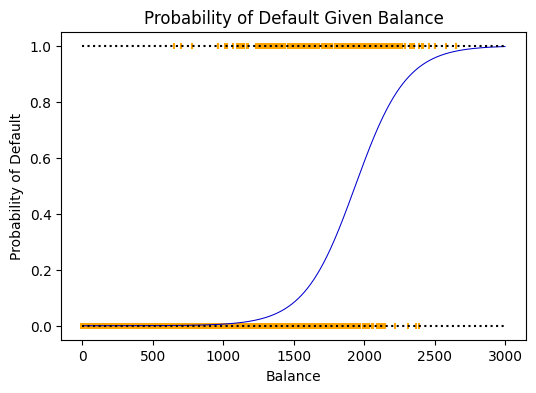

In [110]:
x_seq = np.arange(3000)
y_seq = logistic_function(x_seq, model)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(Default['balance'], Default['default'], marker='|', s=15, color='orange')
ax.plot(x_seq, y_seq, lw=.75, c='mediumblue')
ax.hlines(y=[0,1], xmin=0, xmax=3000, ls='dotted', color='black')
ax.set_xlabel('Balance')
ax.set_ylabel('Probability of Default')
ax.set_title('Probability of Default Given Balance');

This model predicts $P(\text{default = Yes } | \text{ balance}) $

## Multiple Logistic Regression

In [ ]:
features = ['balance', 'income', 'student']
target = ['default']

X = Default[features]
y = Default[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

multi_model = LogisticRegression()
multi_model.fit(X_train, y_train);